# IBM Cares Application - Clustering for Employee Sentiment Analysis during lockdown

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [48]:
raw_data = pd.read_csv('Sample_Survey_Data_V 1.csv')
raw_data

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,...,SOC1,SOC2,SOC3,SOC4,SOC5,PHY1,PHY2,PHY3,PHY4,PHY5
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,...,2.0,2.0,3.0,3.0,4,2.0,2.0,3.0,3.0,4.0
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,...,2.0,2.0,3.0,3.0,4,2.0,2.0,3.0,3.0,4.0
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,...,2.0,2.0,3.0,3.0,3,2.0,2.0,3.0,3.0,NaN
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,...,4.0,3.0,2.0,1.0,1,4.0,3.0,2.0,1.0,1.0
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,...,2.0,3.0,4.0,1.0,3,5.0,4.0,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,...,1.0,5.0,2.0,3.0,4,3.0,4.0,2.0,3.0,2.0
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,...,1.0,5.0,3.0,1.0,2,NaN,NaN,NaN,3.0,4.0
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,...,4.0,5.0,2.0,3.0,4,4.0,1.0,1.0,1.0,2.0
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,...,4.0,5.0,3.0,1.0,2,2.0,5.0,2.0,NaN,NaN


In [49]:
#Copy into a separate dataframe for further calculations
data_avg = raw_data.copy()

#Avrege out Professional Satisfaction
cols_prf = ['PRF1','PRF2','PRF3', 'PRF4', 'PRF5']
data_avg['average_PRF'] = data_avg[cols_prf].astype(float).mean(axis=1)

#Avrege out Professional Emotional Satisfaction
cols_em = ['EM1','EM2','EM3', 'EM4', 'EM5']
data_avg['average_em'] = data_avg[cols_em].astype(float).mean(axis=1)

#Avrege out Pschyocological Satisfaction
cols_psy = ['PSY1','PSY2','PSY3', 'PSY4', 'PSY5']
data_avg['average_psy'] = data_avg[cols_psy].astype(float).mean(axis=1)

#Avrege out Social Satisfaction
cols_soc = ['SOC1','SOC2','SOC3', 'SOC4', 'SOC5']
data_avg['average_soc'] = data_avg[cols_soc].astype(float).mean(axis=1)

#Avrege out Physical Satisfaction
cols_phy = ['PHY1','PHY2','PHY3', 'PHY4', 'PHY5']
data_avg['average_phy'] = data_avg[cols_phy].astype(float).mean(axis=1) 

In [50]:
data_avg

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,...,PHY1,PHY2,PHY3,PHY4,PHY5,average_PRF,average_em,average_psy,average_soc,average_phy
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,...,2.0,2.0,3.0,3.0,4.0,2.8,2.8,2.8,2.8,2.8
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,...,2.0,2.0,3.0,3.0,4.0,2.6,2.8,2.8,2.8,2.8
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,...,2.0,2.0,3.0,3.0,NaN,3.6,2.6,2.5,2.6,2.5
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,...,4.0,3.0,2.0,1.0,1.0,3.8,2.2,2.2,2.2,2.2
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,...,5.0,4.0,3.0,2.0,1.0,3.8,2.8,3.0,2.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,...,3.0,4.0,2.0,3.0,2.0,3.2,3.4,2.8,3.0,2.8
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,...,NaN,NaN,NaN,3.0,4.0,3.6,3.2,3.0,2.4,3.5
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,...,4.0,1.0,1.0,1.0,2.0,3.0,3.6,3.0,3.6,1.8
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,...,2.0,5.0,2.0,NaN,NaN,3.6,2.8,3.2,3.0,3.0


In [51]:
#Only averages in a data frame
data_only_avg = data_avg.copy()

#drop all other columns
data_only_avg.drop(data_only_avg.iloc[:, 10:35], inplace = True, axis = 1)

data_only_avg

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,average_PRF,average_em,average_psy,average_soc,average_phy
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,2.8,2.8,2.8,2.8,2.8
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,2.6,2.8,2.8,2.8,2.8
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,3.6,2.6,2.5,2.6,2.5
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,3.8,2.2,2.2,2.2,2.2
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,3.8,2.8,3.0,2.6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,3.2,3.4,2.8,3.0,2.8
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,3.6,3.2,3.0,2.4,3.5
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,3.0,3.6,3.0,3.6,1.8
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,3.6,2.8,3.2,3.0,3.0


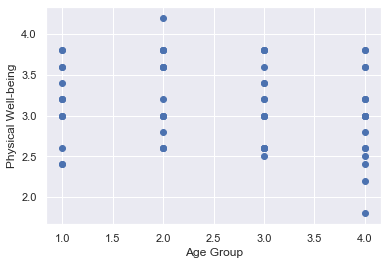

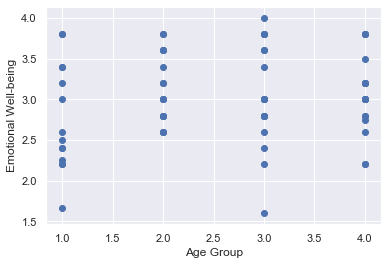

In [52]:
plt.scatter(data_only_avg['Age Group'], data_only_avg['average_PRF'])
plt.xlabel('Age Group')
plt.ylabel('Physical Well-being')
plt.show()

plt.scatter(data_only_avg['Age Group'], data_only_avg['average_em'])
plt.xlabel('Age Group')
plt.ylabel('Emotional Well-being')
plt.show()

In [53]:
#Combine Emotional and Pyschological Well being to measure clusters
data_em_sy = data_only_avg.copy()

cols_em_psy = ['average_em','average_psy']
data_em_sy['average_em_sy'] = data_em_sy[cols_em_psy].astype(float).mean(axis=1)

data_em_sy

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,average_PRF,average_em,average_psy,average_soc,average_phy,average_em_sy
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,2.8,2.8,2.8,2.8,2.8,2.80
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,2.6,2.8,2.8,2.8,2.8,2.80
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,3.6,2.6,2.5,2.6,2.5,2.55
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,3.8,2.2,2.2,2.2,2.2,2.20
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,3.8,2.8,3.0,2.6,3.0,2.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,3.2,3.4,2.8,3.0,2.8,3.10
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,3.6,3.2,3.0,2.4,3.5,3.10
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,3.0,3.6,3.0,3.6,1.8,3.30
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,3.6,2.8,3.2,3.0,3.0,3.00


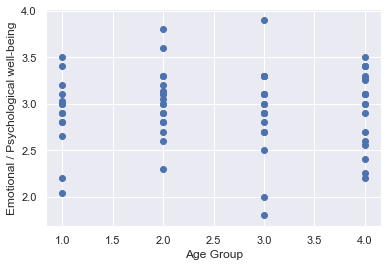

In [54]:
plt.scatter(data_em_sy['Age Group'], data_em_sy['average_em_sy'])
plt.xlabel('Age Group')
plt.ylabel('Emotional / Psychological well-being')
plt.show()

In [67]:
#lets create 4 clustes of the employees 
kmeans = KMeans(4)

In [68]:
#Take specific columns for clustering
data_empsy_clust = data_em_sy[['Age Group', 'average_em_sy']].copy()
data_empsy_clust

,Age Group,average_em_sy
0,2,2.80
1,3,2.80
2,4,2.55
3,1,2.20
4,2,2.90
...,...,...
65,1,3.10
66,2,3.10
67,3,3.30
68,4,3.00


In [69]:
kmeans = KMeans(4)

In [70]:
kmeans.fit(data_empsy_clust)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
identified_clusters = kmeans.fit_predict(data_empsy_clust)
identified_clusters

array([3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 2, 1, 2, 1, 0, 3, 2,
       1, 0, 3, 3, 2, 1, 0, 3, 2, 1, 2, 1, 0, 3, 2, 1, 0, 3, 3, 2, 1, 3,
       2, 1, 0, 3, 2, 1, 0, 3, 2, 1, 0, 2, 1, 0, 3, 3, 2, 1, 3, 2, 1, 0,
       3, 2, 1, 0])

In [72]:
data_with_clusters = data_em_sy.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,RespondentUniqueID,Gender,Age Group,Nationality,BaseCountry,Profession,Marital Status,Dependents,ChronicDisease,Medication,average_PRF,average_em,average_psy,average_soc,average_phy,average_em_sy,Cluster
0,IBM0000001,F,2,AE,UK,4,0,1,0,0,2.8,2.8,2.8,2.8,2.8,2.80,3
1,IBM0000002,F,3,UK,PK,5,0,0,0,0,2.6,2.8,2.8,2.8,2.8,2.80,2
2,IBM0000003,M,4,IN,ZA,1,0,0,0,0,3.6,2.6,2.5,2.6,2.5,2.55,1
3,IBM0000004,M,1,PK,ZA,2,1,0,0,0,3.8,2.2,2.2,2.2,2.2,2.20,0
4,IBM0000005,M,2,BN,ZA,5,1,0,0,0,3.8,2.8,3.0,2.6,3.0,2.90,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,IBM0000066,M,1,PK,ZA,2,1,0,0,0,3.2,3.4,2.8,3.0,2.8,3.10,0
66,IBM0000067,M,2,BN,ZA,5,1,0,0,0,3.6,3.2,3.0,2.4,3.5,3.10,3
67,IBM0000068,F,3,SA,ZA,3,1,1,1,1,3.0,3.6,3.0,3.6,1.8,3.30,2
68,IBM0000069,M,4,ZA,UK,4,1,1,0,0,3.6,2.8,3.2,3.0,3.0,3.00,1


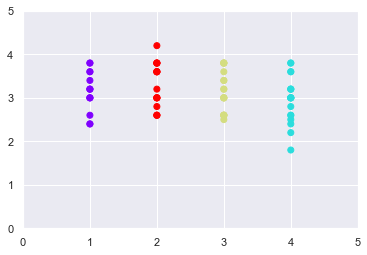

In [81]:
plt.scatter(data_with_clusters['Age Group'], data_with_clusters['average_PRF'],c=data_with_clusters['Cluster'], cmap = 'rainbow' )
plt.xlim(0,5)
plt.ylim(0,5)
plt.show()